# Import Libs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time

# Read data file and some glimpse on the raw data

The dataset for this problem is stress-strain curve of a ferritic steel at different temperatures and strain rates. The stress-strain curve, or flow curve, is a standard way to describe material's mechanical behavior under uniaxial tension loading condition. This mechanical behavior of steel material is dependent on temperature during loading and speed of loading (strain rate).

In [3]:
filename = "FC_all.csv"
df = pd.read_csv(filename, header=0, sep=',', dtype=np.float)
print('Are ther any Nan value?:\n', np.isnan(df).any())
df.head()


Are ther any Nan value?:
 Strain    False
Stress    False
Temp      False
Rate      False
dtype: bool


,Strain,Stress,Temp,Rate
0,0.000007,132.9130,293.0,0.000278
1,0.000009,138.4701,293.0,0.000278
2,0.000010,143.5298,293.0,0.000278
3,0.000010,149.0209,293.0,0.000278
4,0.000017,153.6092,293.0,0.000278


The data mentioned above is the raw data which includes all the flow curves in one dataset. First of all, it should be splitted into one dataframe per one flow curve for the later analysis.

## Splitting flow curves

In [4]:
# Flow curve in normal environment; room temperature/quasi-static loading
df_QSRT = df[(df['Temp']==293.0) & (df['Rate']==0.000278)]
df_QSRT.head()

,Strain,Stress,Temp,Rate
0,0.000007,132.9130,293.0,0.000278
1,0.000009,138.4701,293.0,0.000278
2,0.000010,143.5298,293.0,0.000278
3,0.000010,149.0209,293.0,0.000278
4,0.000017,153.6092,293.0,0.000278


(100, 550)

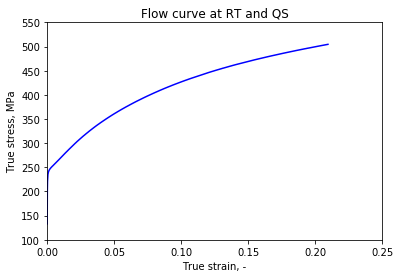

In [5]:
%matplotlib inline

df_QSRT.plot(x='Strain', y='Stress', color='blue')

ax = plt.gca()
ax.legend_ = None
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.title('Flow curve at RT and QS')    #Title name
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=550) # y-axis range

(100, 550)

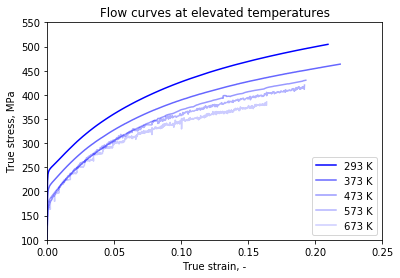

In [6]:
# Flow curve in different temperatures
df_293K = df[(df['Temp']==293.0) & (df['Rate']==0.000278)]
df_373K = df[(df['Temp']==373.0) & (df['Rate']==0.000278)]
df_473K = df[(df['Temp']==473.0) & (df['Rate']==0.000278)]
df_573K = df[(df['Temp']==573.0) & (df['Rate']==0.000278)]
df_673K = df[(df['Temp']==673.0) & (df['Rate']==0.000278)]

plt.plot(df_293K['Strain'], df_293K['Stress'], label='293 K', color='blue', alpha=1.0)
plt.plot(df_373K['Strain'], df_373K['Stress'], label='373 K', color='blue', alpha=0.6)
plt.plot(df_473K['Strain'], df_473K['Stress'], label='473 K', color='blue', alpha=0.4)
plt.plot(df_573K['Strain'], df_573K['Stress'], label='573 K', color='blue', alpha=0.3)
plt.plot(df_673K['Strain'], df_673K['Stress'], label='673 K', color='blue', alpha=0.2)

plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.title('Flow curves at elevated temperatures')    #Title name
plt.legend(loc=4)
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=550) # y-axis range

It is shown from this figure that the higher temperature is, the lower stress during loading.

(100, 550)

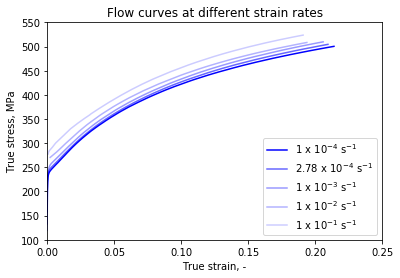

In [7]:
# Flow curves in different strain rates, adiabatic condition
df_e4 = df[df['Rate']==0.0001]
df_QS = df[(df['Rate']==0.000278) & (df['Temp']==293.0)]
df_e3 = df[df['Rate']==0.001]
df_e2 = df[(df['Rate']==0.01) & (df['Temp']!=293.0) & (df['Temp']!=373.0)]
df_e1 = df[(df['Rate']==0.1) & (df['Temp']!=293.0)]

plt.plot(df_e4['Strain'], df_e4['Stress'], label='1 x 10$^{-4}$ s$^{-1}$', color='blue', alpha=1.0)
plt.plot(df_QS['Strain'], df_QS['Stress'], label='2.78 x 10$^{-4}$ s$^{-1}$', color='blue', alpha=0.6)
plt.plot(df_e3['Strain'], df_e3['Stress'], label='1 x 10$^{-3}$ s$^{-1}$', color='blue', alpha=0.4)
plt.plot(df_e2['Strain'], df_e2['Stress'], label='1 x 10$^{-2}$ s$^{-1}$', color='blue', alpha=0.3)
plt.plot(df_e1['Strain'], df_e1['Stress'], label='1 x 10$^{-1}$ s$^{-1}$', color='blue', alpha=0.2)

plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.title('Flow curves at different strain rates')    #Title name
plt.legend(loc=4)
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=550) # y-axis range

On the other hand, the faster loading is, the higher stress during loading.

Please be noted that the flow curves at different strain rates above are in adiabatic condition. There is no control in temperature during the tests. Therefore, the temperature of the samples rose higher for the high strain rate tests especially at 1x10$^{-2}$ and 1x10$^{-1}$ s$^{-1}$ strain rates. This information cannot be taken into account for further material's behavior analysis. Thus, they should be corrected into isothermal flow curves which are shown below.

(290, 310)

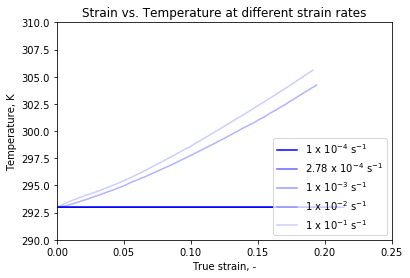

In [8]:
# plot strain vs. temperature for each high speed test result
plt.plot(df_e4['Strain'], df_e4['Temp'], label='1 x 10$^{-4}$ s$^{-1}$', color='blue', alpha=1.0)
plt.plot(df_QS['Strain'], df_QS['Temp'], label='2.78 x 10$^{-4}$ s$^{-1}$', color='blue', alpha=0.6)
plt.plot(df_e3['Strain'], df_e3['Temp'], label='1 x 10$^{-3}$ s$^{-1}$', color='blue', alpha=0.4)
plt.plot(df_e2['Strain'], df_e2['Temp'], label='1 x 10$^{-2}$ s$^{-1}$', color='blue', alpha=0.3)
plt.plot(df_e1['Strain'], df_e1['Temp'], label='1 x 10$^{-1}$ s$^{-1}$', color='blue', alpha=0.2)

plt.xlabel('True strain, -')    #Name x label
plt.ylabel('Temperature, K')    #Name y label
plt.title('Strain vs. Temperature at different strain rates')    #Title name
plt.legend(loc=4)
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=290, ymax=310) # y-axis range

This plot shows that, at high strain rate loading, the temperature also rise during loading. It means that the observed stress-strain behavior does not only include strain rate effect but also couple the temperature effect.

(100, 550)

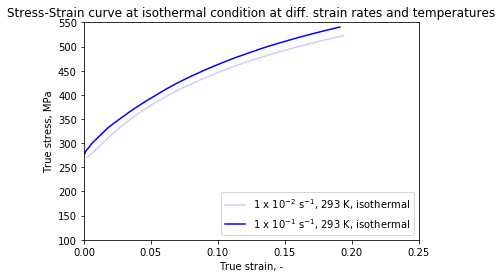

In [9]:
# Flow curve in isothermal conditions

df_e2_iso = df[(df['Rate']==0.01) & (df['Temp']==293.0) & (df['Strain']>0.0022)]
df_e1_iso = df[(df['Rate']==0.1) & (df['Temp']==293.0) & (df['Strain']>0.0007)]
df_e2_373K = df[(df['Rate']==0.01) & (df['Temp']==373.0)]


plt.plot(df_e2_iso['Strain'], df_e2_iso['Stress'], label='1 x 10$^{-2}$ s$^{-1}$, 293 K, isothermal', color='blue', alpha=0.2)
plt.plot(df_e1_iso['Strain'], df_e1_iso['Stress'], label='1 x 10$^{-1}$ s$^{-1}$, 293 K, isothermal', color='blue', alpha=1.0)

plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.title('Stress-Strain curve at isothermal condition at diff. strain rates and temperatures')    #Title name
plt.legend(loc=4)
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=550) # y-axis range

In [10]:
# Put all flow curves as list
flows = {'QSRT': df_QSRT,
         '373K': df_373K, 
         '473K': df_473K,
         '573K': df_573K,
         '673K': df_673K,
         'e4': df_e4,
         'e3': df_e3,
         'e2': df_e2,
         'e1': df_e1,
         'e2_iso': df_e2_iso,
         'e1_iso': df_e1_iso,
         'e2_373K': df_e2_373K}

(100, 550)

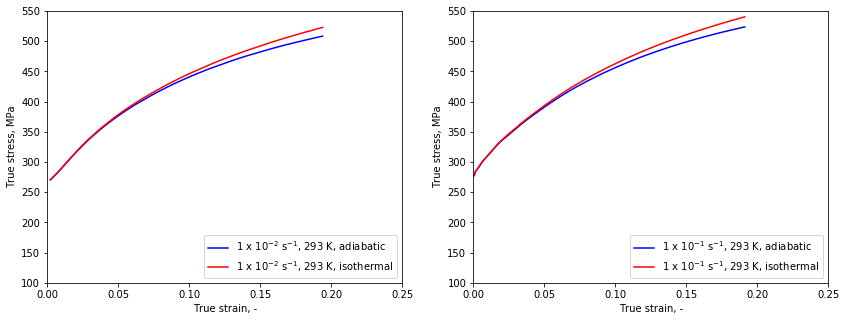

In [11]:
# compare isothermal flow curves and adiabatic flow curves
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(df_e2['Strain'], df_e2['Stress'], label='1 x 10$^{-2}$ s$^{-1}$, 293 K, adiabatic', color='blue', alpha=1.0)
plt.plot(df_e2_iso['Strain'], df_e2_iso['Stress'], label='1 x 10$^{-2}$ s$^{-1}$, 293 K, isothermal', color='red', alpha=1.0)
plt.legend(loc=4)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=550) # y-axis range

plt.subplot(1,2,2)
plt.plot(df_e1['Strain'], df_e1['Stress'], label='1 x 10$^{-1}$ s$^{-1}$, 293 K, adiabatic', color='blue', alpha=1.0)
plt.plot(df_e1_iso['Strain'], df_e1_iso['Stress'], label='1 x 10$^{-1}$ s$^{-1}$, 293 K, isothermal', color='red', alpha=1.0)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.legend(loc=4)
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=550) # y-axis range


One can notice that the flow curves in isothermal condition are higher than the ones in adiabatic condition. It is straightforward once we have a look at the flow curves in the different temperatures. If temperature inside the sample becomes higher, the material becomes softer. As the high strain rate test is a fast process, there is no time for the material to dissipate the heat generated to the ambient. Thus, the internal temperature rises higher.

# Preprocessing

It is a good idea to modify a little bit on the raw data to obtain a better result. It is planned to preprocess as follows:
- apply decadic logarithm to strain and strain rate
- apply scaling scheme to avoid ill-conditioned calculation
- include features in the previous time step as the current time step's feature

In [12]:
# apply decadic log
flows_log = {}
for key, fc in flows.items():
    fc = fc.reset_index(drop=True)
    # apply decadic log to strain rates
    log_rate = pd.DataFrame(np.log10(fc['Rate'].values))
    log_rate.columns = ['log_rate']
    # apply decadic log to strain
    log_strain = pd.DataFrame(np.log10(fc['Strain'].values))
    log_strain.columns = ['log_strain']
    fc_log = pd.concat([fc, log_strain, log_rate], axis=1)
    fc_log = fc_log.drop(columns=['Strain', 'Rate'])
    flows_log[key] = fc_log
raw_features = len(flows_log['QSRT'].columns.values)
flows_log['QSRT'].columns.values

array(['Stress', 'Temp', 'log_strain', 'log_rate'], dtype=object)

In [13]:
flows_log['373K'].head()

,Stress,Temp,log_strain,log_rate
0,101.782707,373.0,-5.545155,-3.555955
1,105.151962,373.0,-4.906578,-3.555955
2,109.145012,373.0,-4.703335,-3.555955
3,113.392250,373.0,-4.583359,-3.555955
4,118.894752,373.0,-4.548214,-3.555955


In [14]:
# apply scaling
flows_scaled = {}
stress_range = np.array([100, 550])
temp_range = np.array([290, 700])
log_strain_range = [np.log10(0.25), np.log10(1e-9)] # valid only if strain < 1.0
log_rate_range = [np.log10(0.1), np.log10(0.0001)] # valid only if rate < 1.0

def manual_scaling(feat, range_value):
    return (feat - range_value[0])/range_value[1]
def manual_descaling(feat, range_value): # inverse of the function above
    return feat * range_value[1] + range_value[0]

for key, fc in flows_log.items():
    fc['Stress'] = manual_scaling(fc['Stress'], stress_range)
    fc['Temp'] = manual_scaling(fc['Temp'], temp_range)
    fc['log_strain'] = manual_scaling(fc['log_strain'], log_strain_range)
    fc['log_rate'] = manual_scaling(fc['log_rate'], log_rate_range)
    flows_scaled[key] = fc
flows_scaled['373K'].head()

,Stress,Temp,log_strain,log_rate
0,0.003241,0.118571,0.549233,0.638989
1,0.009367,0.118571,0.478280,0.638989
2,0.016627,0.118571,0.455697,0.638989
3,0.024350,0.118571,0.442367,0.638989
4,0.034354,0.118571,0.438462,0.638989


In [15]:
# apply window shifting
flows_shifted = {}
windows = 2
if windows > 0:
    ori_cols = flows_scaled['QSRT'].columns
    cols = [c + '(t)' for c in ori_cols]
    for w in range(1, windows+1):
        for c in ori_cols:
            cols.append(c+'(t-{})'.format(w))

    for key, fc in flows_scaled.items():
        shifted = pd.DataFrame({'':[]})
        for w in range(0, windows):
            sh = fc.shift(w+1)
            shifted = pd.concat([shifted, sh], axis=1)
        fc = pd.concat([fc,shifted], axis=1)
        fc = fc.drop(columns='')
        fc = fc.dropna()
        fc.columns = cols
        flows_shifted[key] = fc
else:
    flows_shifted = flows_scaled
    cols = flows_shifted['QSRT'].columns.values
print(cols)
flows_shifted['373K'].head(windows+3)

['Stress(t)', 'Temp(t)', 'log_strain(t)', 'log_rate(t)', 'Stress(t-1)', 'Temp(t-1)', 'log_strain(t-1)', 'log_rate(t-1)', 'Stress(t-2)', 'Temp(t-2)', 'log_strain(t-2)', 'log_rate(t-2)']


,Stress(t),Temp(t),log_strain(t),log_rate(t),Stress(t-1),Temp(t-1),log_strain(t-1),log_rate(t-1),Stress(t-2),Temp(t-2),log_strain(t-2),log_rate(t-2)
2,0.016627,0.118571,0.455697,0.638989,0.009367,0.118571,0.478280,0.638989,0.003241,0.118571,0.549233,0.638989
3,0.024350,0.118571,0.442367,0.638989,0.016627,0.118571,0.455697,0.638989,0.009367,0.118571,0.478280,0.638989
4,0.034354,0.118571,0.438462,0.638989,0.024350,0.118571,0.442367,0.638989,0.016627,0.118571,0.455697,0.638989
5,0.043421,0.118571,0.432082,0.638989,0.034354,0.118571,0.438462,0.638989,0.024350,0.118571,0.442367,0.638989
6,0.051994,0.118571,0.425526,0.638989,0.043421,0.118571,0.432082,0.638989,0.034354,0.118571,0.438462,0.638989


In [16]:
for key, fc in flows_shifted.items():
    print('Shape of dataframe {}: {}'.format(key, fc.shape))

Shape of dataframe QSRT: (5304, 12)
Shape of dataframe 373K: (1337, 12)
Shape of dataframe 473K: (2008, 12)
Shape of dataframe 573K: (1182, 12)
Shape of dataframe 673K: (953, 12)
Shape of dataframe e4: (1372, 12)
Shape of dataframe e3: (1237, 12)
Shape of dataframe e2: (1916, 12)
Shape of dataframe e1: (1903, 12)
Shape of dataframe e2_iso: (1915, 12)
Shape of dataframe e1_iso: (1902, 12)
Shape of dataframe e2_373K: (1010, 12)


## Decompose train and test set

In [17]:
test_set_name = ['e2_iso', 'e1_iso', 'e2_373K']
train_set = []
test_set = []
for key, fc in flows_shifted.items():
    if key in test_set_name:
        test_set.append(fc)
    else:
        train_set.append(fc)
df_train = pd.concat(train_set)

## Decompose label and feature

In [18]:
if windows == 0:
    lbl_name = 'Stress'
else:
    lbl_name = 'Stress(t)'

ignore_cols = ['Stress(t-'+str(w)+')' if (w>0) else '' for w in range(1, windows+1)] 
# including stress into training yield too good result. Let's ignore it somehow.    
# ignore_cols = []

def decomp_label_feat(df, lbl_col, ignore_cols=[]):
    label = pd.DataFrame(df[lbl_col])
    ignore_cols.append(lbl_col)
    feat = df.drop(columns=ignore_cols)
    return feat.values, label.values.ravel()
def restore_strain(log_strain_col, range_value):
    log_strain = manual_descaling(log_strain_col, log_strain_range)
    return 10**log_strain
    
print('Original columns: \n\n',cols,'\n')
print('Label column...', lbl_name, '\n')
print('Ignore columns...', ignore_cols, '\n')


X_train, y_train = decomp_label_feat(df_train, lbl_name, ignore_cols)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_test = {}
y_test = {}
for ii, df_test in enumerate(test_set):
    X_test[test_set_name[ii]], y_test[test_set_name[ii]] = decomp_label_feat(df_test, lbl_name, ignore_cols)
    print('X_test shape for set ' + test_set_name[ii], X_test[test_set_name[ii]].shape)
    print('y_test shape for set ' + test_set_name[ii], y_test[test_set_name[ii]].shape)


Original columns: 

 ['Stress(t)', 'Temp(t)', 'log_strain(t)', 'log_rate(t)', 'Stress(t-1)', 'Temp(t-1)', 'log_strain(t-1)', 'log_rate(t-1)', 'Stress(t-2)', 'Temp(t-2)', 'log_strain(t-2)', 'log_rate(t-2)'] 

Label column... Stress(t) 

Ignore columns... ['Stress(t-1)', 'Stress(t-2)'] 

X_train shape: (17212, 9)
y_train shape: (17212,)
X_test shape for set e2_iso (1915, 9)
y_test shape for set e2_iso (1915,)
X_test shape for set e1_iso (1902, 9)
y_test shape for set e1_iso (1902,)
X_test shape for set e2_373K (1010, 9)
y_test shape for set e2_373K (1010,)


# Start modeling

## SVR

In [19]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy import stats
from scipy.stats import randint as sp_randint

In [20]:
# utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [21]:
# train
runSVR = False
np.random.seed(52)
n_iter = 20
param_dist = {'C': stats.uniform(1000, 10000),
             'gamma': stats.uniform(0.00001, 0.1),
             'epsilon': stats.uniform(0.0001, 0.1)}
if runSVR: # avoid running this line
    svr = SVR()
    random_search_svr = RandomizedSearchCV(svr, param_distributions=param_dist, n_iter=n_iter, scoring='neg_mean_squared_error')
    start = time.time()
    random_search_svr.fit(X_train, y_train)
    elapsed_svr = (time.time() - start)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % (elapsed_svr, n_iter))
    report(random_search_svr.cv_results_)

In [22]:
# test
if runSVR:
    best_svr = random_search_svr.best_estimator_
else:
    best_svr_param =  {'C': 8430.669105102152, 'epsilon': 0.007974907332177594, 'gamma': 0.04877452580166796}
    best_svr = SVR(**best_svr_param) 

best_svr.fit(X_train, y_train)
print('r2_score for training set:', r2_score(y_train, best_svr.predict(X_train)))
svr_test_pred = {}
for key, X in X_test.items():
    svr_test_pred[key] = manual_descaling(best_svr.predict(X), stress_range)


r2_score for training set: 0.9979217660106492


r2_score for e2_iso: 0.9964295002429818
r2_score for e1_iso: 0.9917482743291813


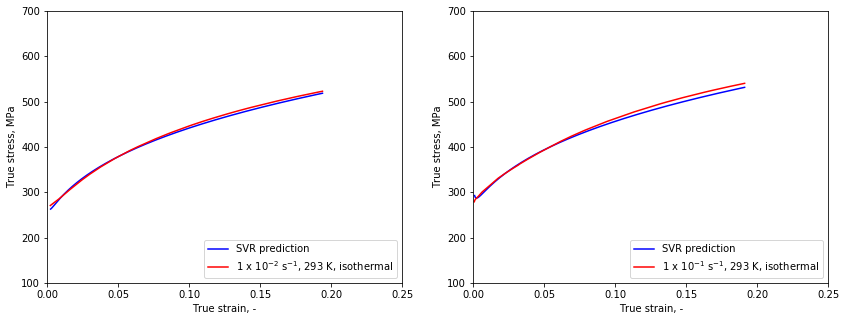

In [23]:
# plot results
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(df_e2_iso['Strain'][windows:], svr_test_pred['e2_iso'], label='SVR prediction', color='blue', alpha=1.0)
plt.plot(df_e2_iso['Strain'], df_e2_iso['Stress'], label='1 x 10$^{-2}$ s$^{-1}$, 293 K, isothermal', color='red', alpha=1.0)
plt.legend(loc=4)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for e2_iso:', r2_score(df_e2_iso['Stress'][windows:], svr_test_pred['e2_iso']))

plt.subplot(1,2,2)
plt.plot(df_e1_iso['Strain'][windows:], svr_test_pred['e1_iso'], label='SVR prediction', color='blue', alpha=1.0)
plt.plot(df_e1_iso['Strain'], df_e1_iso['Stress'], label='1 x 10$^{-1}$ s$^{-1}$, 293 K, isothermal', color='red', alpha=1.0)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.legend(loc=4)
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for e1_iso:', r2_score(df_e1_iso['Stress'][windows:], svr_test_pred['e1_iso']))


## ANN

In [24]:
from keras.layers import Dense
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


In [25]:
def ANNmodel(hid_layers=[], in_dim=1, out_dim=1):
    model = Sequential()
    if len(hid_layers) == 0:
        model.add(Dense(out_dim, input_dim=in_dim, activation='relu', kernel_initializer='normal'))
    else:
        model.add(Dense(hid_layers[0], input_dim=in_dim, activation='relu', kernel_initializer='normal'))
        for layer in hid_layers:
            model.add(Dense(layer, activation='relu'))
        model.add(Dense(out_dim))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def get_hid_layers(min_layers=0, max_layers=5, min_neurons=1, max_neurons=10, n_iter=1):
    hid_layers = []
    for _ in range(n_iter):
        layers = np.random.randint(min_layers, max_layers)
        hid_layers.append(np.random.randint(low=min_neurons, high=max_neurons, size=layers).tolist())
    return hid_layers

In [26]:
#train
runANN = False
np.random.seed(99)
n_iter = 100
param_dist = {'hid_layers': get_hid_layers(max_layers=10, min_neurons=1, max_neurons=20, n_iter=n_iter)}

if runANN:
    ann = KerasRegressor(build_fn=ANNmodel, in_dim=X_train.shape[1], epochs=50, batch_size=256, verbose=0)
    random_search_ann = GridSearchCV(estimator=ann, param_grid=param_dist, scoring='neg_mean_squared_error')
    start = time.time()
    random_search_ann.fit(X_train, y_train)
    elapsed_ann = (time.time() - start)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % (elapsed_ann, n_iter))
    report(random_search_ann.cv_results_)

In [27]:
# test
if runANN:
    best_ann = random_search_ann.best_estimator_
else:
    best_ann_param =  {'hid_layers': [4]} 
    best_ann = KerasRegressor(build_fn=ANNmodel, in_dim=X_train.shape[1], epochs=50, batch_size=256, **best_ann_param)

best_ann.fit(X_train, y_train)
print('r2_score for training set:', r2_score(y_train, best_ann.predict(X_train)))
ann_test_pred = {}
for key, X in X_test.items():
    ann_test_pred[key] = manual_descaling(best_ann.predict(X), stress_range)







Epoch 1/50
17212/17212 [==============================] - 0s 12us/step - loss: 0.2283
Epoch 2/50
17212/17212 [==============================] - 0s 3us/step - loss: 0.1009
Epoch 3/50
17212/17212 [==============================] - 0s 3us/step - loss: 0.0504
Epoch 4/50
17212/17212 [==============================] - 0s 3us/step - loss: 0.0396
Epoch 5/50
17212/17212 [==============================] - 0s 3us/step - loss: 0.0327
Epoch 6/50
17212/17212 [==============================] - 0s 3us/step - loss: 0.0272
Epoch 7/50
17212/17212 [==============================] - 0s 3us/step - loss: 0.0227
Epoch 8/50
17212/17212 [==============================] - 0s 3us/step - loss: 0.0190
Epoch 9/50
17212/17212 [==============================] - 0s 2us/step - loss: 0.0158
Epoch 10/50
17212/17212 [==============================] - 0s 2us/step - loss: 0.0131
Epoch 11/50
17212/17212 [==============================] - 0s 2us/step - loss: 0.0107
Epoch 12/50
17212/17212 [==============================]

r2_score for e2_iso: 0.9860454279137223
r2_score for e1_iso: 0.9621808405820781


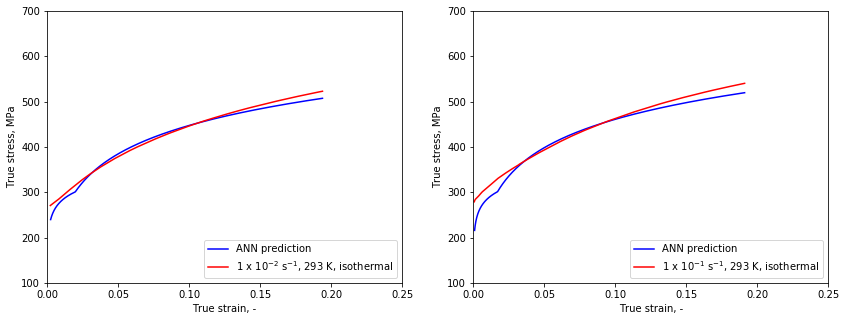

In [28]:
# plot results
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(df_e2_iso['Strain'][windows:], ann_test_pred['e2_iso'], label='ANN prediction', color='blue', alpha=1.0)
plt.plot(df_e2_iso['Strain'], df_e2_iso['Stress'], label='1 x 10$^{-2}$ s$^{-1}$, 293 K, isothermal', color='red', alpha=1.0)
plt.legend(loc=4)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for e2_iso:', r2_score(df_e2_iso['Stress'][windows:], ann_test_pred['e2_iso']))

plt.subplot(1,2,2)
plt.plot(df_e1_iso['Strain'][windows:], ann_test_pred['e1_iso'], label='ANN prediction', color='blue', alpha=1.0)
plt.plot(df_e1_iso['Strain'], df_e1_iso['Stress'], label='1 x 10$^{-1}$ s$^{-1}$, 293 K, isothermal', color='red', alpha=1.0)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.legend(loc=4)
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for e1_iso:', r2_score(df_e1_iso['Stress'][windows:], ann_test_pred['e1_iso']))


## Vanilla LSTM

In [29]:
from keras.layers import LSTM

In [30]:
def vLSTMmodel(input_shape, nNeurons=1, out_dim=1):
    model = Sequential()
    model.add(LSTM(nNeurons, input_shape=input_shape, activation='relu'))
    model.add(Dense(out_dim))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [31]:
#train
runLSTM = False
np.random.seed(157)
n_iter = 100
param_dist = {'nNeurons': range(1, 200, 1)}
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
if runLSTM:
    vlstm = KerasRegressor(build_fn=vLSTMmodel, input_shape=X_train_lstm.shape[1:], epochs=50,  verbose=0)
    random_search_vlstm = RandomizedSearchCV(estimator=vlstm, param_distributions=param_dist, scoring='neg_mean_squared_error')
    start = time.time()
    random_search_vlstm.fit(X_train_lstm, y_train)
    elapsed_lstm = (time.time() - start)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % (elapsed_lstm, n_iter))
    report(random_search_vlstm.cv_results_)

In [32]:
# test
if runLSTM:
    best_vlstm = random_search_vlstm.best_estimator_
else:
    best_vlstm_param =  {'nNeurons': 121}
    best_vlstm = KerasRegressor(build_fn=vLSTMmodel, input_shape=X_train_lstm.shape[1:], epochs=50,  verbose=0)

best_vlstm.fit(X_train_lstm, y_train)
print('r2_score for training set:', r2_score(y_train, best_vlstm.predict(X_train_lstm)))
vlstm_test_pred = {}
for key, X in X_test.items():
    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
    vlstm_test_pred[key] = manual_descaling(best_vlstm.predict(X), stress_range)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
r2_score for training set: -0.0002103607166130672


r2_score for e2_iso: -0.3486248615481584
r2_score for e1_iso: -0.6298564849472403


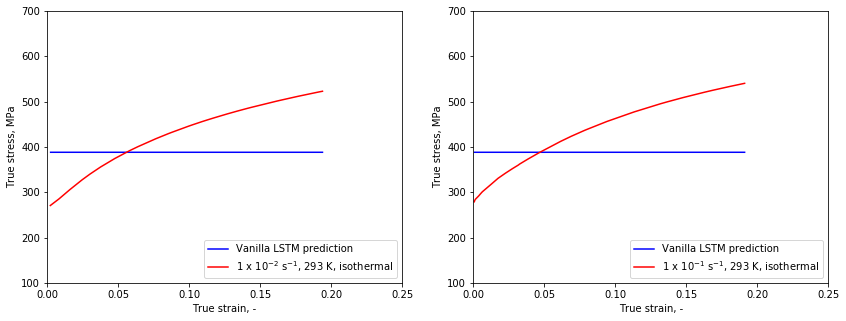

In [33]:
# plot results
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(df_e2_iso['Strain'][windows:], vlstm_test_pred['e2_iso'], label='Vanilla LSTM prediction', color='blue', alpha=1.0)
plt.plot(df_e2_iso['Strain'], df_e2_iso['Stress'], label='1 x 10$^{-2}$ s$^{-1}$, 293 K, isothermal', color='red', alpha=1.0)
plt.legend(loc=4)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for e2_iso:', r2_score(df_e2_iso['Stress'][windows:], vlstm_test_pred['e2_iso']))

plt.subplot(1,2,2)
plt.plot(df_e1_iso['Strain'][windows:], vlstm_test_pred['e1_iso'], label='Vanilla LSTM prediction', color='blue', alpha=1.0)
plt.plot(df_e1_iso['Strain'], df_e1_iso['Stress'], label='1 x 10$^{-1}$ s$^{-1}$, 293 K, isothermal', color='red', alpha=1.0)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.legend(loc=4)
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for e1_iso:', r2_score(df_e1_iso['Stress'][windows:], vlstm_test_pred['e1_iso']))


## Free form viz

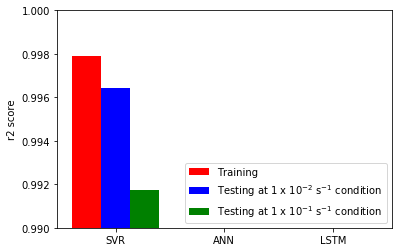

In [34]:
name_list = ['SVR','ANN','LSTM']
train_list = [r2_score(y_train, best_svr.predict(X_train)),
              r2_score(y_train, best_ann.predict(X_train)),
              r2_score(y_train, best_vlstm.predict(X_train_lstm))]
test_list_e2 = [r2_score(df_e2_iso['Stress'][windows:], svr_test_pred['e2_iso']),
                r2_score(df_e2_iso['Stress'][windows:], ann_test_pred['e2_iso']),
                r2_score(df_e2_iso['Stress'][windows:], vlstm_test_pred['e2_iso'])]
test_list_e1 = [r2_score(df_e1_iso['Stress'][windows:], svr_test_pred['e1_iso']),
                r2_score(df_e1_iso['Stress'][windows:], ann_test_pred['e1_iso']),
                r2_score(df_e1_iso['Stress'][windows:], vlstm_test_pred['e1_iso'])]
x =list(range(len(train_list)))
total_width, n = 0.8, 3
width = total_width / n
 
plt.bar(x, train_list, width=width, label='Training', fc = 'r')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, test_list_e2, width=width, label='Testing at 1 x 10$^{-2}$ s$^{-1}$ condition', tick_label = name_list, fc = 'b')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, test_list_e1, width=width, label='Testing at 1 x 10$^{-1}$ s$^{-1}$ condition', fc = 'g')
plt.legend(loc='lower right')
plt.ylabel('r2 score')
plt.ylim(ymin=0.99,ymax=1.00) # x-axis range
from pylab import *
tick_params(bottom='off')
plt.savefig('score.png',dpi=300)

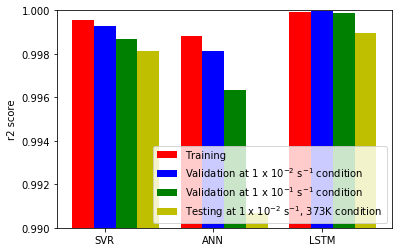

In [42]:
name_list = ['SVR','ANN','LSTM']
train_list = [0.999564, 0.998809, 0.999929]
test_list_e2 = [0.999303, 0.998150, 0.999988]
test_list_e1 = [0.998667, 0.996332, 0.999878]
final_list = [0.998133, 0.990678, 0.998957]
x =list(range(len(train_list)))
total_width, n = 0.8, 4
width = total_width / n
 
plt.bar(x, train_list, width=width, label='Training', fc = 'r')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, test_list_e2, width=width, label='Validation at 1 x 10$^{-2}$ s$^{-1}$ condition', tick_label = name_list, fc = 'b')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, test_list_e1, width=width, label='Validation at 1 x 10$^{-1}$ s$^{-1}$ condition', fc = 'g')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, final_list, width=width, label='Testing at 1 x 10$^{-2}$ s$^{-1}$, 373K condition', fc = 'y')
plt.legend(loc='lower right')
plt.ylabel('r2 score')
plt.ylim(ymin=0.99,ymax=1.00) # x-axis range
from pylab import *
tick_params(bottom='off')
plt.savefig('score.png',dpi=300)

## Test with unknown data

There is the last flow curves that was hidden in the dataset. This flow curve is the isothermal flow curve at 1 x 10$^{-2}$ s$^{-1}$ and 373 K. It was just introduced from here. Therefore, the models will never see it.

### Prediction

r2_score for SVR: 0.959530128685744


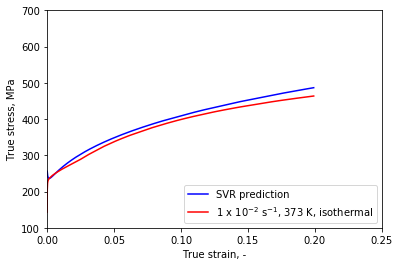

In [36]:
X_e2_373K = X_test['e2_373K']
X_e2_373K_lstm = np.reshape(X_e2_373K, (X_e2_373K.shape[0], 1, X_e2_373K.shape[1]))

svr_unknown_pred = manual_descaling(best_svr.predict(X_e2_373K), stress_range)
ann_unknown_pred = manual_descaling(best_ann.predict(X_e2_373K), stress_range)
vlstm_unknown_pred = manual_descaling(best_vlstm.predict(X_e2_373K_lstm), stress_range)

# plot results
# plt.figure(figsize=(21,5))
# plt.subplot(1,3,1)
plt.plot(df_e2_373K['Strain'][windows:], svr_unknown_pred, label='SVR prediction', color='blue', alpha=1.0)
plt.plot(df_e2_373K['Strain'], df_e2_373K['Stress'], label='1 x 10$^{-2}$ s$^{-1}$, 373 K, isothermal', color='red', alpha=1.0)
plt.legend(loc=4)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for SVR:', r2_score(df_e2_373K['Stress'][windows:], svr_unknown_pred))






r2_score for ANN: 0.8731755134433479


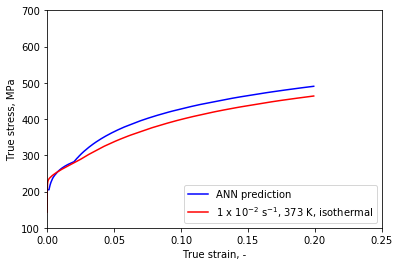

In [37]:
# plt.subplot(1,3,2)
plt.plot(df_e2_373K['Strain'][windows:], ann_unknown_pred, label='ANN prediction', color='blue', alpha=1.0)
plt.plot(df_e2_373K['Strain'], df_e2_373K['Stress'], label='1 x 10$^{-2}$ s$^{-1}$, 373 K, isothermal', color='red', alpha=1.0)
plt.legend(loc=4)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for ANN:', r2_score(df_e2_373K['Stress'][windows:], ann_unknown_pred))

r2_score for LSTM: -0.027066277746547796


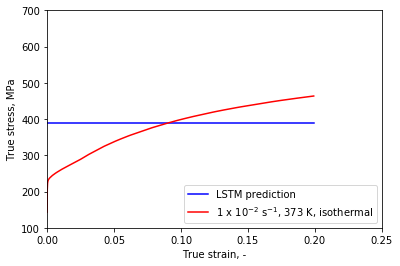

In [38]:
# plt.subplot(1,3,3)
plt.plot(df_e2_373K['Strain'][windows:], vlstm_unknown_pred, label='LSTM prediction', color='blue', alpha=1.0)
plt.plot(df_e2_373K['Strain'], df_e2_373K['Stress'], label='1 x 10$^{-2}$ s$^{-1}$, 373 K, isothermal', color='red', alpha=1.0)
plt.legend(loc=4)
plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=700) # y-axis range
print('r2_score for LSTM:', r2_score(df_e2_373K['Stress'][windows:], vlstm_unknown_pred))